In [2]:
import random
import pickle
import os
import cv2
import numpy as np
import tensorflow
from PIL import Image
from matplotlib import pyplot as plt
from patchify import patchify
from enum import Enum
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from predict_B_fun import predict_modelB
from predict_A_fun import predict_modelA
from predict_C_fun import predict_modelC


Segmentation Models: using `tf.keras` framework.


In [3]:
image_path = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\MASSACHUSETTS_ROADS_DATASET\test\11128870_15.tiff"
# image_path = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\LANDCOVER_AI\ORIGINAL\images\N-34-97-C-b-1-2.tif"


mask_path = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\MASSACHUSETTS_ROADS_DATASET\test_labels\11128870_15.tif"

scale = 1
# enlarge pixel size
# eg. scale 4 changes pixel size from 25x25cm to 100x100cm

chosen_model = 2
# 1 for Model A
# 2 for Model B
# 3 for Model C


In [4]:
if chosen_model == 1:
    image_original, image_cropped, image_prediction = predict_modelA(image_path,scale)
elif chosen_model == 2:
    image_original, image_cropped, image_prediction = predict_modelB(image_path,scale)
elif chosen_model == 3:
    image_original, image_cropped, image_prediction = predict_modelC(image_path,scale)
else:
    print("ERROR: INVALID MODEL CHOSEN")


INPUT IMAGE (1500, 1500, 3)
SCALE = 1
SCALED IMAGE (1500, 1500, 3)
CROPPED IMAGE (1280, 1280, 3)
initial patches: (5, 5, 1, 256, 256, 3)
Predicting patch: 0 0
UNIQUE: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 2

In [5]:
mask_original = cv2.cvtColor(cv2.imread(mask_path), cv2.COLOR_BGR2RGB)
mask_scaled = cv2.resize(mask_original, (mask_original.shape[1] // scale, mask_original.shape[0] // scale))

new_height_m = image_cropped.shape[0]
new_width_m = image_cropped.shape[1]

mask_cropped = mask_scaled[: new_height_m, : new_width_m, :]
mask_cropped = (mask_cropped[:,:,0] > 128).astype(np.float32)
mask_cropped = np.expand_dims(mask_cropped, axis=-1)

if (mask_cropped.shape[:] == image_cropped.shape[:]):
    print("MASK AND IMAGE SHAPE CONSISTENT")
else:
    print("ERROR: DIFFERENT SHAPE FOR MASK AND IMAGE")

mask_flat = mask_cropped.flatten()
pred_flat = image_prediction.flatten()

sk_acc = accuracy_score(mask_flat, pred_flat)
sk_jac = jaccard_score(mask_flat, pred_flat, average="macro")

print(sk_acc)
print(sk_jac)

ERROR: DIFFERENT SHAPE FOR MASK AND IMAGE
0.9724798583984375
0.8130786005030071


In [10]:
# ted cokoli co je blizko 1 je 1
count_1 = np.count_nonzero(pred_flat)
count_0 = len(pred_flat) - count_1
count_tot = len(pred_flat)
print(count_1)
print(count_0)
print(count_tot)

112892
1525508
1638400


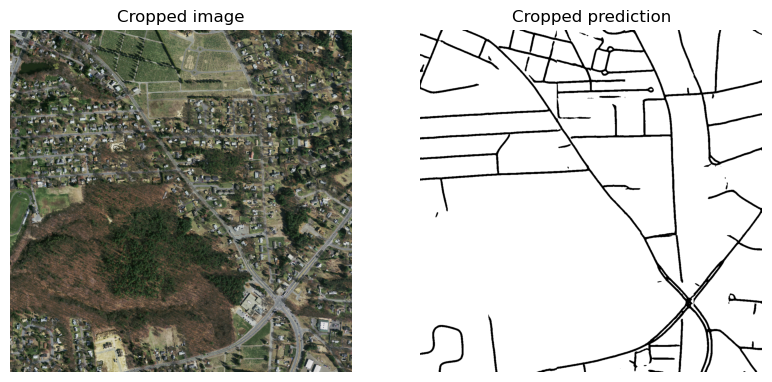

In [6]:
# print(sk_acc)
# print(sk_jac)

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB))
plt.title('Cropped image')
plt.axis('off')
"""
plt.subplot(1,3,2)
plt.imshow(mask_cropped, cmap='binary')
plt.title('Mask')
plt.axis('off')
"""
plt.subplot(1,3,2)
plt.imshow(image_prediction, cmap='binary')
plt.title('Cropped prediction')
plt.axis('off')

plt.show()


In [12]:
# root_directory = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\DUBAI_DS\Semantic segmentation dataset"
root_directory = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\MASSACHUSETTS_ROADS_DATASET\upravena struktura test"
# root_directory = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\LANDCOVER_AI\ORIGINAL"

image_paths = []
mask_paths = []

for path, subdirs, files in sorted(os.walk(root_directory)):
    dirname = path.split(os.path.sep)[-1]
    if dirname == "images":
        image_paths.extend([os.path.join(path, img_name) for img_name in sorted(files)])
    elif dirname == "masks":
        mask_paths.extend([os.path.join(path, mask_name) for mask_name in sorted(files)])


print("Image paths:")
for img_path in image_paths:
    print(img_path)

print("\nMask paths:")
for mask_path in mask_paths:
    print(mask_path)



Image paths:
C:\Users\jiric\Documents\VUT\BP\DATASETS\MASSACHUSETTS_ROADS_DATASET\upravena struktura test\images\10378780_15.tiff
C:\Users\jiric\Documents\VUT\BP\DATASETS\MASSACHUSETTS_ROADS_DATASET\upravena struktura test\images\10828720_15.tiff
C:\Users\jiric\Documents\VUT\BP\DATASETS\MASSACHUSETTS_ROADS_DATASET\upravena struktura test\images\11128870_15.tiff
C:\Users\jiric\Documents\VUT\BP\DATASETS\MASSACHUSETTS_ROADS_DATASET\upravena struktura test\images\11278840_15.tiff
C:\Users\jiric\Documents\VUT\BP\DATASETS\MASSACHUSETTS_ROADS_DATASET\upravena struktura test\images\11728825_15.tiff
C:\Users\jiric\Documents\VUT\BP\DATASETS\MASSACHUSETTS_ROADS_DATASET\upravena struktura test\images\12328750_15.tiff
C:\Users\jiric\Documents\VUT\BP\DATASETS\MASSACHUSETTS_ROADS_DATASET\upravena struktura test\images\15928855_15.tiff
C:\Users\jiric\Documents\VUT\BP\DATASETS\MASSACHUSETTS_ROADS_DATASET\upravena struktura test\images\16078870_15.tiff
C:\Users\jiric\Documents\VUT\BP\DATASETS\MASSACHUSE

In [13]:
print(len(image_paths))
print(len(mask_paths))

if len(image_paths) == len(mask_paths):
    print("Lists of images and masks paths consist of the same number of elements:", len(image_paths))
else:
    print("ERROR: Different number of images and masks")

paths_length = len(image_paths)

accuracy_values = []
jaccard_values = []

for i in range(paths_length-35):

    print("\n IMAGE",i+1,"/",paths_length,"\n")
    
    mask_path = mask_paths[i]
    image_path = image_paths[i]

    if chosen_model == 1:
        image_original, image_cropped, image_prediction = predict_modelA(image_path,scale)
    elif chosen_model == 2:
        image_original, image_cropped, image_prediction = predict_modelB(image_path,scale)
    elif chosen_model == 3:
        image_original, image_cropped, image_prediction = predict_modelC(image_path,scale)
    else:
        print("ERROR: INVALID MODEL CHOSEN")


    mask_original = cv2.cvtColor(cv2.imread(mask_path), cv2.COLOR_BGR2RGB)
    mask_scaled = cv2.resize(mask_original, (mask_original.shape[1] // scale, mask_original.shape[0] // scale))

    new_height_m = image_cropped.shape[0]
    new_width_m = image_cropped.shape[1]

    mask_cropped = mask_scaled[: new_height_m, : new_width_m, :]

    # PROCESOVANI PRO MASKY DATASETU MASSACHUSETTS
    mask_cropped = (mask_cropped[:,:,0] < 128).astype(np.float32)
    mask_cropped = np.expand_dims(mask_cropped, axis=-1)

    print("Cropped mask shape:", mask_cropped.shape)
    print("Cropped mask values", np.unique(mask_cropped))

    if (mask_cropped.shape[:] == image_cropped.shape[:]):
        print("MASK AND IMAGE SHAPE CONSISTENT")
    else:
        print("ERROR: DIFFERENT SHAPE FOR MASK AND IMAGE")

    mask_flat = mask_cropped.flatten()
    pred_flat = image_prediction.flatten()

    sk_acc = accuracy_score(mask_flat, pred_flat)
    sk_jac = jaccard_score(mask_flat, pred_flat, average="macro")

    accuracy_values.append(sk_acc)
    jaccard_values.append(sk_jac)

    print("Prediction accuracy:", sk_acc)
    print("Prediction jaccard index:", sk_jac)

    

49
49
Lists of images and masks paths consist of the same number of elements: 49

 IMAGE 1 / 49 

INPUT IMAGE (1500, 1500, 3)
SCALE = 1
SCALED IMAGE (1500, 1500, 3)
CROPPED IMAGE (1280, 1280, 3)
initial patches: (5, 5, 1, 256, 256, 3)
Predicting patch: 0 0
Predicting patch: 0 1
Predicting patch: 0 2
Predicting patch: 0 3
Predicting patch: 0 4
Predicting patch: 1 0
Predicting patch: 1 1
Predicting patch: 1 2
Predicting patch: 1 3
Predicting patch: 1 4
Predicting patch: 2 0
Predicting patch: 2 1
Predicting patch: 2 2
Predicting patch: 2 3
Predicting patch: 2 4
Predicting patch: 3 0
Predicting patch: 3 1
Predicting patch: 3 2
Predicting patch: 3 3
Predicting patch: 3 4
Predicting patch: 4 0
Predicting patch: 4 1
Predicting patch: 4 2
Predicting patch: 4 3
Predicting patch: 4 4
PREDICTION FINISHED
PREDICTION SHAPE AND VALUES: (1280, 1280, 1) [0. 1.]
Cropped mask shape: (1280, 1280, 1)
Cropped mask values [0. 1.]
ERROR: DIFFERENT SHAPE FOR MASK AND IMAGE
Prediction accuracy: 0.9859460449218

In [14]:
print(len(accuracy_values))
print(len(jaccard_values))

mean_j = np.mean(jaccard_values)
mean_a = np.mean(accuracy_values)

print(mean_a)
print(mean_j)

idm = jaccard_values.index(max(jaccard_values))
print(idm)


14
14
0.9836247907366072
0.8023547469198091
7


INPUT IMAGE (9711, 9081, 3)
SCALE = 1
SCALED IMAGE (9711, 9081, 3)
CROPPED IMAGE (9472, 8960, 3)
initial patches: (37, 35, 1, 256, 256, 3)
Predicting patch: 0 0
Predicting patch: 0 1
Predicting patch: 0 2
Predicting patch: 0 3
Predicting patch: 0 4
Predicting patch: 0 5
Predicting patch: 0 6
Predicting patch: 0 7
Predicting patch: 0 8
Predicting patch: 0 9
Predicting patch: 0 10
Predicting patch: 0 11
Predicting patch: 0 12
Predicting patch: 0 13
Predicting patch: 0 14
Predicting patch: 0 15
Predicting patch: 0 16
Predicting patch: 0 17
Predicting patch: 0 18
Predicting patch: 0 19
Predicting patch: 0 20
Predicting patch: 0 21
Predicting patch: 0 22
Predicting patch: 0 23
Predicting patch: 0 24
Predicting patch: 0 25
Predicting patch: 0 26
Predicting patch: 0 27
Predicting patch: 0 28
Predicting patch: 0 29
Predicting patch: 0 30
Predicting patch: 0 31
Predicting patch: 0 32
Predicting patch: 0 33
Predicting patch: 0 34
Predicting patch: 1 0
Predicting patch: 1 1
Predicting patch: 1 2


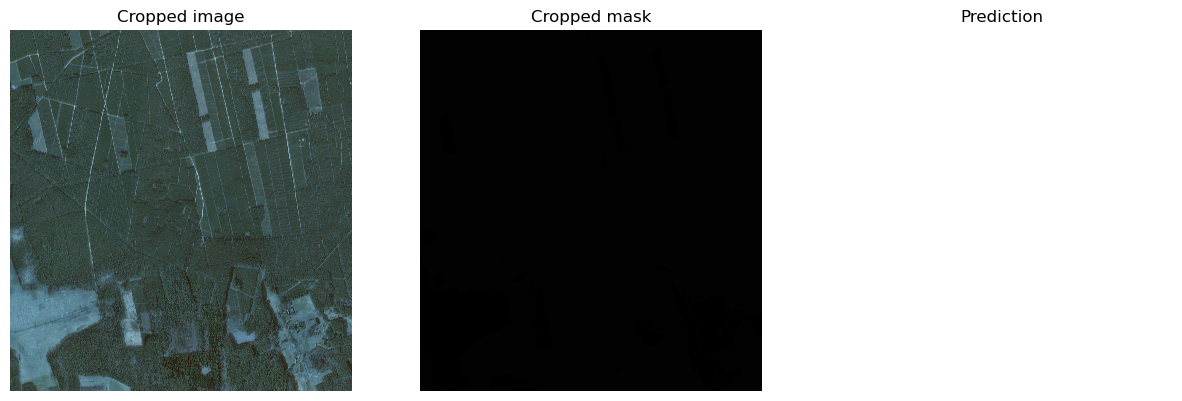

In [153]:
idw = random.randint(0, len(accuracy_values) - 1)

if chosen_model == 1:
    _ , image_sample, prediction_sample = predict_modelA(image_paths[idw],scale)
elif chosen_model == 2:
    _ , image_sample, prediction_sample = predict_modelB(image_paths[idw],scale)

mask_sample = cv2.imread(mask_paths[idw])
mask_sample = cv2.cvtColor(mask_sample, cv2.COLOR_BGR2RGB)
new_height_m = image_cropped.shape[0]
new_width_m = image_cropped.shape[1]

mask_scaled = cv2.resize(mask_sample, (mask_sample.shape[1] // scale, mask_sample.shape[0] // scale))

new_height_m = prediction_sample.shape[0]
new_width_m = prediction_sample.shape[1]

mask_sample = mask_scaled[: new_height_m, : new_width_m, :]

print("Cropped mask shape: ", mask_sample.shape)


print("ACCURACY = ", accuracy_values[idw])
print("JACCARD INDEX = ", jaccard_values[idw])

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image_sample, cv2.COLOR_BGR2RGB))
plt.title('Cropped image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask_sample)
plt.title('Cropped mask')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(prediction_sample, cmap='binary')
plt.title('Prediction')
plt.axis('off')

plt.show()

In [151]:
print(accuracy_score(mask_sample.flatten(), prediction_sample.flatten()))
print(jaccard_score(mask_sample.flatten(), prediction_sample.flatten(), average='macro'))

ValueError: Found input variables with inconsistent numbers of samples: [254607360, 84869120]

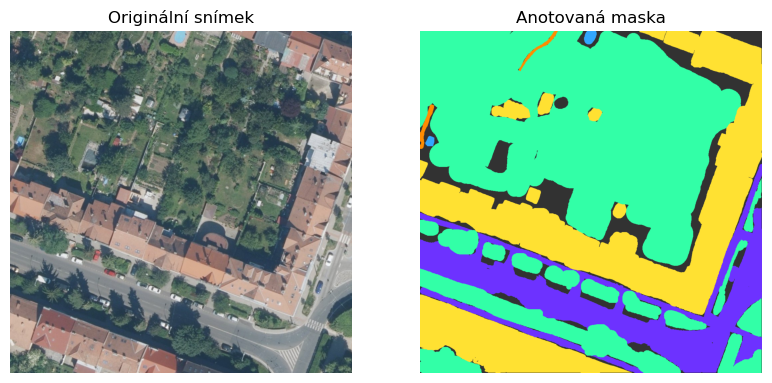

In [27]:

ds_image_sample_path = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\CUSTOM_CZ_DATASET\Semantic segmentation dataset V30 LITE\Tile 15\images\BLAN982_0.jpg"
ds_mask_sample_path = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\CUSTOM_CZ_DATASET\Semantic segmentation dataset V30 LITE\Tile 15\masks\BLAN982_0.png"

ds_image_sample = cv2.imread(ds_image_sample_path)
ds_mask_sample = cv2.imread(ds_mask_sample_path)

ds_image_sample = cv2.cvtColor(ds_image_sample, cv2.COLOR_BGR2RGB)
ds_mask_sample = cv2.cvtColor(ds_mask_sample, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(ds_image_sample)
plt.title("Originální snímek")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(ds_mask_sample)
plt.title('Anotovaná maska')
plt.axis('off')


plt.show()
